# NBA player statistic analysis

The data set is made by Justinas Cirtautas who utilised the NBA Stats API to pull together this data set with https://stats.nba.com/ being the source. The dataset can be found here: https://www.kaggle.com/datasets/justinas/nba-players-data

This data set has data on each player who has been part of an NBA teams' roster (from seasons 1996-2021). There is biographic variables such as age, height, weight and country of birth, NBA related details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds, assists, as well advanced statistics such as true shooting percentage.


The header of the dataset is shown below: 

| Index | player_name | team_abbreviation | age | player_height | player_weight | college | country | draft_year | draft_round | draft_number | gp | pts | reb | ast | net_rating | oreb_pct | dreb_pct | usg_pct | ts_pct | ast_pct | season |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
#### Description of Fields

* __Index__ - index/ID for player
* __player_name__ - name of the player
* __team_abbreviation__ - Abbreviated name of the team the player played for (at the end of the season)
* __age__ - Age of the player
* __player_height__ - Height of the player (in centimeters)
* __player_weight__ - Weight of the player (in kilograms) 
* __college__ - Name of the college the player attended
* __country__ - Name of the country the player was born in (not necessarily the nationality)
* __draft_year__ - The year the player was drafted
* __draft_round__ - The draft round the player was picked
* __draft_number__ - The number at which the player was picked in his draft round
* __gp__ - Games played throughout the season
* __pts__ - Average number of points scored
* __reb__ - Average number of rebounds grabbed 
* __ast__ - Average number of assists distributed
* __net_rating__ - Team's point differential per 100 possessions while the player is on the court (how much a team is outscored by or outscore the other team by when they're playing)
* __oreb_pct__ - Percentage of available offensive rebounds the player grabbed while he was on the floor
* __dreb_pct__ - Percentage of available defensive rebounds the player grabbed while he was on the floor
* __usg_pct__ - Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)
* __ts_pct__ - Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (half the points scored divided by the sum of the field goals attempted and 0.475 times the free throws attempted)
* __ast_pct__ - Percentage of teammate field goals the player assisted while he was on the floor
* __season__ - the season the data was took

The goal is to build and evaluate a model which predicts **net_rating** using the variables from the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE, RFECV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
df = pd.read_csv('all_seasons.csv')
df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
df.head(10)

,Index,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97
6,6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994,1,...,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97
7,7,Elden Campbell,LAL,28.0,213.36,113.398000,Clemson,USA,1990,1,...,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-97
8,8,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992,Undrafted,...,5.7,1.6,1.3,-0.3,0.036,0.076,0.172,0.539,0.141,1996-97
9,9,Elliot Perry,MIL,28.0,182.88,72.574720,Memphis,USA,1991,2,...,6.9,1.5,3.0,-1.2,0.018,0.081,0.177,0.557,0.262,1996-97


In [3]:
len(df)

12305

In [4]:
df.isna().sum()

Index                0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

there is no null data, therefore data can be considered clean

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

We are focusing on how **net_rating** can be predicted by a player's in game statistics or their biological information. So any variables other than that are to be dropped.

However since the **player_name** is a object type of data, it needs to be turned to a numerical data to be able to be used for regression

In [6]:
ord_enc = OrdinalEncoder()
df["player_name"] = ord_enc.fit_transform(df[["player_name"]])

In [7]:
df2 = df.drop(columns=['team_abbreviation', 'college', 'country', 'season', 'draft_year', 'draft_round', 'draft_number'])
df2.head(10)

,Index,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,592.0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,1,704.0,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,2,715.0,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,3,719.0,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,4,720.0,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040
5,5,726.0,38.0,200.66,97.522280,52,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102
6,6,727.0,25.0,198.12,86.182480,80,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149
7,7,736.0,28.0,213.36,113.398000,77,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087
8,8,737.0,29.0,193.04,86.182480,71,5.7,1.6,1.3,-0.3,0.036,0.076,0.172,0.539,0.141
9,9,744.0,28.0,182.88,72.574720,82,6.9,1.5,3.0,-1.2,0.018,0.081,0.177,0.557,0.262


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          12305 non-null  int64  
 1   player_name    12305 non-null  float64
 2   age            12305 non-null  float64
 3   player_height  12305 non-null  float64
 4   player_weight  12305 non-null  float64
 5   gp             12305 non-null  int64  
 6   pts            12305 non-null  float64
 7   reb            12305 non-null  float64
 8   ast            12305 non-null  float64
 9   net_rating     12305 non-null  float64
 10  oreb_pct       12305 non-null  float64
 11  dreb_pct       12305 non-null  float64
 12  usg_pct        12305 non-null  float64
 13  ts_pct         12305 non-null  float64
 14  ast_pct        12305 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 1.4 MB


<AxesSubplot:xlabel='net_rating', ylabel='Count'>

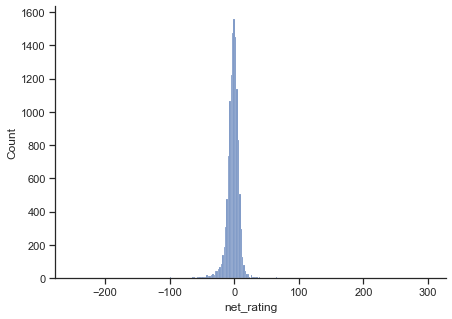

In [9]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(df, x='net_rating', bins=250)

the curve for **net_rating** looks pretty small but the means still look normally distributed. So any inference made from the analysis should be fine

In [10]:
df2.corr()

,Index,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
Index,1.000000,0.014943,-0.132799,-0.056464,-0.072682,-0.083579,0.039607,-0.001822,0.021699,-0.004113,-0.162082,0.002365,-0.049260,0.139735,-0.002232
player_name,0.014943,1.000000,-0.014453,0.017389,-0.011238,0.004522,-0.006434,-0.021185,-0.002215,0.005763,-0.004947,-0.030421,0.012766,0.000622,0.003279
age,-0.132799,-0.014453,1.000000,-0.008954,0.058544,0.055218,0.008118,0.035623,0.090209,0.091746,-0.057147,0.018330,-0.119416,0.025175,0.066766
player_height,-0.056464,0.017389,-0.008954,1.000000,0.825421,0.002202,-0.056564,0.423275,-0.449033,-0.002877,0.589485,0.614963,-0.104714,0.072154,-0.614631
player_weight,-0.072682,-0.011238,0.058544,0.825421,1.000000,0.019652,-0.026664,0.437930,-0.378784,0.004043,0.600643,0.607045,-0.067385,0.068142,-0.529440
gp,-0.083579,0.004522,0.055218,0.002202,0.019652,1.000000,0.539066,0.470948,0.385836,0.253262,-0.016396,0.067266,0.146806,0.375816,0.133982
pts,0.039607,-0.006434,0.008118,-0.056564,-0.026664,0.539066,1.000000,0.624889,0.660949,0.218366,-0.123674,0.054804,0.638853,0.376571,0.332815
reb,-0.001822,-0.021185,0.035623,0.423275,0.437930,0.470948,0.624889,1.000000,0.241018,0.190940,0.407976,0.612226,0.230552,0.314569,-0.069771
ast,0.021699,-0.002215,0.090209,-0.449033,-0.378784,0.385836,0.660949,0.241018,1.000000,0.165098,-0.340600,-0.198130,0.392533,0.176083,0.802527
net_rating,-0.004113,0.005763,0.091746,-0.002877,0.004043,0.253262,0.218366,0.190940,0.165098,1.000000,0.060166,0.051433,0.018866,0.316474,0.066176


1. Correlation between Index and net_rating is: <span style="color:red">-0.004113</span>
2. Correlation between player_name and net rating is: <span style="color:green">0.005763</span>
3. Correlation between age and net_rating is: <span style="color:green">0.091746</span>
4. Correlation between player_height and net_rating is: <span style="color:red">-0.002877</span>
5. Correlation between player_weight and net_rating is: <span style="color:green">0.004043</span>
6. Correlation between gp and net_rating is: <span style="color:green">**0.253262**</span>
7. Correlation between pts and net_rating is: <span style="color:green">**0.218366**</span>
8. Correlation between reb and net_rating is: <span style="color:green">**0.190940**</span>
9. Correlation between ast and net_rating is: <span style="color:green">**0.165098**</span>
10. Correlation between oreb_pct and net_rating is: <span style="color:green">0.060166</span>
11. Correlation between dreb_pct and net_rating is: <span style="color:green">0.051433</span>
12. Correlation between usg_pct and net_rating is: <span style="color:green">0.018866</span>
13. Correlation between ts_pct and net_rating is: <span style="color:green">**0.316474**</span>
14. Correlation between ast_pct and net_rating is: <span style="color:green">0.066176</span>

From these correlations we can see that the most correlated feature with **net_rating** is **ts_pct** which is positively correlated by 0.316474. This correlation is not that strong though however and might not accurately predict **net_rating**.

While the least correlated feature with **net_rating** is **player_height** which is negatively correlated by 0.002877 (-0.002877).

### Linear regression with most correlated variable

In [11]:
# splitting the dataset

train, test = train_test_split(df2, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(9844, 15)
(2461, 15)


In [12]:
reg = linear_model.LinearRegression()
X_train = train[['ts_pct']]
y_train = train['net_rating']

X_test = test[['ts_pct']]
y_test = test['net_rating']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
print("y = x *", reg.coef_, "+", reg.intercept_) ## for the formula/equation of the model

X_train shape:  (9844, 1)
y_train shape:  (9844,)
X_test shape:  (2461, 1)
y_test shape:  (2461,)
      ts_pct
6182   0.561
3612   0.531
7538   0.505
4143   0.482
8144   0.629
6182    4.0
3612   -4.4
7538   -8.0
4143   -1.9
8144   -3.9
Name: net_rating, dtype: float64
y = x * [41.72072784] + -23.55654998146181


In [13]:
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)

print("MSE:", mse)
print("R Squared:", r2)

MSE: 127.51571613227672
R Squared: 0.07124736715759183


The Mean Squared Error is large, which is bad since the smaller the value is the more it shows how accurate the model is in predicting **net_rating**.

As for the $R^2$, it states that a model with **ts_pct** as the sole predictor will only account for approximately 7.12% of the variation in **net_rating** which is a pretty small number.

In conclusion, this model is a poor fit for predicting **net_rating**. We should try seeing if the model needs more features

### Polynomial linear regression with all the variables

In [14]:
reg2 = linear_model.LinearRegression()
X_train2 = train[['Index', 'player_name', 'age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'oreb_pct', 
                'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
y_train2 = train['net_rating']

X_test2 = test[['Index', 'player_name', 'age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'oreb_pct', 
                'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
y_test2 = test['net_rating']

print("X_train shape: ", X_train2.shape)
print("y_train shape: ", y_train2.shape)
print("X_test shape: ", X_test2.shape)
print("y_test shape: ", y_test2.shape)
print(X_train2.head())
print(y_train2.head())

reg2.fit(X_train2, y_train2)
predicted2 = reg2.predict(X_test2)
print("y = x *", reg2.coef_, "+", reg2.intercept_) ## for the formula/equation of the model

X_train shape:  (9844, 14)
y_train shape:  (9844,)
X_test shape:  (2461, 14)
y_test shape:  (2461,)
      Index  player_name   age  player_height  player_weight  gp   pts  reb  \
6182   6182        870.0  37.0         203.20     102.058200  81  11.3  5.5   
3612   3612       2292.0  29.0         203.20      99.790240   8   2.4  1.0   
7538   7538         69.0  26.0         198.12      99.336648  82  10.3  3.9   
4143   4143        403.0  33.0         208.28     111.130040  75  20.2  9.9   
8144   8144       1212.0  24.0         193.04      97.522280  24   5.6  1.6   

      ast  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  
6182  2.4     0.037     0.160    0.168   0.561    0.111  
3612  0.0     0.077     0.119    0.247   0.531    0.000  
7538  1.6     0.032     0.119    0.168   0.505    0.081  
4143  3.4     0.074     0.229    0.276   0.482    0.157  
8144  0.5     0.007     0.130    0.175   0.629    0.081  
6182    4.0
3612   -4.4
7538   -8.0
4143   -1.9
8144   -3.9
Name: net_rating,

In [15]:
mse_2 = ((np.array(y_test2)-predicted2)**2).sum()/len(y_test2)
r2_2 = r2_score(y_test2, predicted2)

print("MSE:", mse_2)
print("R Squared:", r2_2)

MSE: 117.19685554635987
R Squared: 0.1464041339294816


The Mean Squared Error is still quite large, however the value is still smaller compared with the previous model (where **ts_pct** is the sole predictor). Meaning that this model is more accurate compared to the previous one.

As for the $R^2$, it states that a model with all the available predictors that is related to in game statistics and biological information will only account for approximately 14.64% of the variation in **net_rating**. Although it is still quite a small number, it still accounts for more variation in **net_rating** compared to the previous model 

However not all of the features can be considered relevant, so we need to try to see which of the features we used can be considered important to predict **net_rating**

### Using RFE to find important features

MSE using 1 features:  127.51571613227672
MSE using 2 features:  127.51969934212136
MSE using 3 features:  125.86429572355351
MSE using 4 features:  125.18127856623052
MSE using 5 features:  125.18100497015108
MSE using 6 features:  122.06873888861531
MSE using 7 features:  119.56969559584151
MSE using 8 features:  119.47437552649086
MSE using 9 features:  118.56182487424486
MSE using 10 features:  118.41374530859021
MSE using 11 features:  117.15572518038373
MSE using 12 features:  116.99163785913659
MSE using 13 features:  117.14930187668367
MSE using 14 features:  117.19685554635987


Text(0, 0.5, 'MSE')

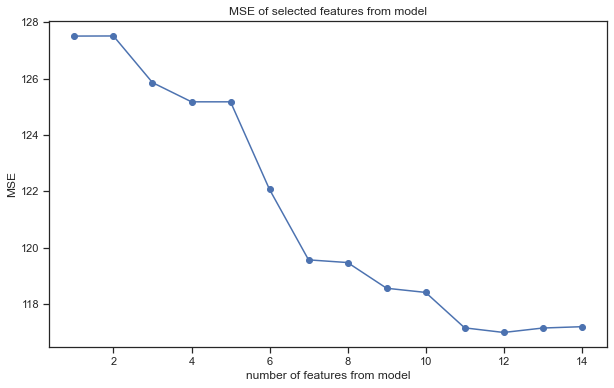

In [16]:
# finding how many features would give the test set the highest MSE

MSE_list = []
for i in range(1,15):
    rfe = RFE(estimator=reg2, n_features_to_select=i)
    # training model
    rfe.fit(X_train2, y_train2)
    # predicting on test set
    y_pred = rfe.predict(X_test2)
    MSE = ((np.array(y_test2)-y_pred)**2).sum()/len(y_test2)
    # print this
    print("MSE using", i, "features: ", MSE)
    # append to the list
    MSE_list.append(MSE)

plt.figure(figsize=(10,6))
plt.plot(range(1,15), MSE_list, marker='o')
plt.title('MSE of selected features from model')
plt.xlabel('number of features from model')
plt.ylabel('MSE')

r2 using 1 features:  0.07124736715759183
r2 using 2 features:  0.07121835570125856
r2 using 3 features:  0.08327538299009007
r2 using 4 features:  0.0882500951462154
r2 using 5 features:  0.08825208786591165
r2 using 6 features:  0.11092008052600089
r2 using 7 features:  0.12912170388780808
r2 using 8 features:  0.12981596156880093
r2 using 9 features:  0.1364624663807752
r2 using 10 features:  0.13754099450768664
r2 using 11 features:  0.1467037043420455
r2 using 12 features:  0.14789882394178366
r2 using 13 features:  0.14675048806725144
r2 using 14 features:  0.1464041339294816


Text(0, 0.5, 'r2')

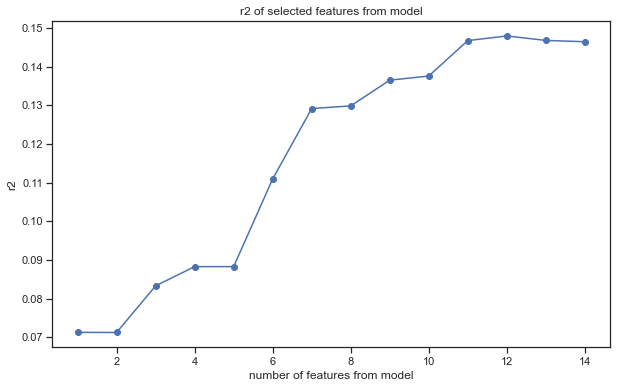

In [17]:
# finding how many features would give the test set the highest R-squared

r2_list = []
for i in range(1,15):
    rfe = RFE(estimator=reg2, n_features_to_select=i)
    # training model
    rfe.fit(X_train2, y_train2)
    # predicting on test set
    y_pred = rfe.predict(X_test2)
    R2 = r2_score(y_test2, y_pred)
    # print this
    print("r2 using", i, "features: ", R2)
    # append to the list
    r2_list.append(R2)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15), r2_list, marker='o')
plt.title('r2 of selected features from model')
plt.xlabel('number of features from model')
plt.ylabel('r2')

From the result it can be seen that the MSE reaches the lowest and the $R^2$ can reaches the highest when the model only has 12 features.

Since after that there are features added that are considered to be not important, since they increase the MSE as well as decrease the $R^2$.

In [18]:
# checking the r2 and MSE on test with 12 of the 14 features now

rfe = RFE(estimator=reg2, n_features_to_select=12, step=1)
rfe.fit(X_train2, y_train2)

# doing evaluation
y_pred = rfe.predict(X_test2)
print("r2: ", r2_score(y_test2, y_pred))
print("MSE: ", ((np.array(y_test2)-y_pred)**2).sum()/len(y_test2))

r2:  0.14789882394178366
MSE:  116.99163785913659


In [19]:
# seeing the 12 relevant features
for i in range(X_train2.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000


The first 2 columns, **Index** and **player_name** are considered not important, and are removed for the next regression model

### Polynomial linear regression with the important features

In [20]:
reg3 = linear_model.LinearRegression()
X_train3 = train[['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'oreb_pct', 
                'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
y_train3 = train['net_rating']

X_test3 = test[['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'oreb_pct', 
                'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
y_test3 = test['net_rating']

print("X_train shape: ", X_train3.shape)
print("y_train shape: ", y_train3.shape)
print("X_test shape: ", X_test3.shape)
print("y_test shape: ", y_test3.shape)
print(X_train3.head())
print(y_train3.head())

reg3.fit(X_train3, y_train3)
predicted3 = reg3.predict(X_test3)
print("y = x *", reg3.coef_, "+", reg3.intercept_) ## for the formula/equation of the model

X_train shape:  (9844, 12)
y_train shape:  (9844,)
X_test shape:  (2461, 12)
y_test shape:  (2461,)
       age  player_height  player_weight  gp   pts  reb  ast  oreb_pct  \
6182  37.0         203.20     102.058200  81  11.3  5.5  2.4     0.037   
3612  29.0         203.20      99.790240   8   2.4  1.0  0.0     0.077   
7538  26.0         198.12      99.336648  82  10.3  3.9  1.6     0.032   
4143  33.0         208.28     111.130040  75  20.2  9.9  3.4     0.074   
8144  24.0         193.04      97.522280  24   5.6  1.6  0.5     0.007   

      dreb_pct  usg_pct  ts_pct  ast_pct  
6182     0.160    0.168   0.561    0.111  
3612     0.119    0.247   0.531    0.000  
7538     0.119    0.168   0.505    0.081  
4143     0.229    0.276   0.482    0.157  
8144     0.130    0.175   0.629    0.081  
6182    4.0
3612   -4.4
7538   -8.0
4143   -1.9
8144   -3.9
Name: net_rating, dtype: float64
y = x * [  0.20266772  -0.04473818  -0.0444108    0.04698628   0.35237081
  -0.28354663   0.20438359  39

In [21]:
mse_3 = ((np.array(y_test3)-predicted3)**2).sum()/len(y_test3)
r2_3 = r2_score(y_test3, predicted3)

print("MSE:", mse_3)
print("R Squared:", r2_3)

MSE: 116.99163785913659
R Squared: 0.14789882394178366


The Mean Squared Error is still quite large, however the value is still smaller compared to the other models. Meaning that this model is more accurate compared to the other models.

As for the $R^2$, it states that a model with all the available predictors that is related to in game statistics and biological information, except for **Index** and **player_name** will only account for approximately 14.79% of the variation in **net_rating**. Although it is still quite a small number, it still accounts for more variation in net_rating compared to other models.

In conclusion, even though this model still has a quite high MSE and still quite low $R^2$; this model with in-game statistics and player's biological information (all except for **Index** and **player_name**) is considered the best model to predict a player's**net_rating**.

According to the model:
- a increase by **age**, <span style="color:green">increases net rating by 0.20266772</span>
- a increase in player's **height**, <span style="color:red">decreases net rating by 0.04473818</span>
- a increase in player's **weight**, <span style="color:red">decreases net rating by 0.0444108</span>
- a increase in **games played**, <span style="color:green">increases net rating by 0.04698628</span>
- a increase in **points scored per game**, <span style="color:green">increase net rating by 0.35237081</span>
- a increase in **rebounds per game**, <span style="color:red">decrease net rating by 0.28354663</span>
- a increase in **assists per game**, <span style="color:green">increase net rating by 0.20438359</span>
- a increase in percentage of available **offensive rebounds the player grabbed** while he was on the floor, <span style="color:green">increase net rating by 39.6605294</span>
- a increase in percentage of available **defensive rebounds the player grabbed** while he was on the floor, <span style="color:green">increase net rating by 3.87035509</span>
- a increase in percentage of **team plays used by the player** while he was on the floor, <span style="color:red">decrease net rating by 26.8068732</span>
- a increase in measure of the **player's shooting efficiency** that takes into account free throws, 2 and 3 point shots, <span style="color:green">increase net rating by 31.92486136</span>
- a increase in percentage of **teammate field goals the player assisted** while he was on the floor, <span style="color:green">increase net rating by 1.92806506</span>

Some key takeaways:
- non-NBA watchers might think a player's team is **more likely to outscore** the other team **if the player has a higher height**, however this model says that <span style="color:red">this isn't necessarily true</span>, and the opposite may be true

- According to the model, the more the percentage of teams plays is used by a player, the lower net rating will be (the opponent will outscore the team more), meaning being **relying highly on a single player may be ineffecient**

- According to the model, <span style="color:green">a team will be more likely to outscore an opponent if the players get a higher percentage of available **offensive rebounds**</span> while he was on the floor (since this gives the team another chance to score).

- On a similar note, unsurprisingly a team will be more likely to outscore an opponent if the players have a higher shooting efficiency. But what's **more surprising** is according to the model, <span style="color:green">getting an **offensive rebound** seems to be more significant in order to secure a victory.</span>